In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from pathlib import Path
data_path = Path("../src")
dataset = Path(data_path / "AnnualCauseDeathNumbers.csv")
data = pd.read_csv(dataset)

### En este apartado, estudiaremos las muertes causadas por enfermedades que surgen en las personas.

### En mi opinión, las enfermedades tienden a tener un mayor porcentaje de mortalidad en lugares dónde es díficil acceder a una cura.

### Algunos motivos pueden ser porque la sanidad en ese país no sea pública y el precio de la medicina se encuentre muy alto, o porque el nivel de pobreza del país sea muy elevado.

In [3]:
bio = ['Entity','Year','Meningitis fatalities','Parkinson fatalities','Malaria fatalities','HIV/AIDS fatalities','Tuberculosis fatalities',"Diarrheal disease fatalities","Neoplasm fatalities","Diabetes fatalities","Chronic kidney fatalities","Digestive disease fatalities","Acute hepatitis fatalities","Measles fatalities"]
bio


['Entity',
 'Year',
 'Meningitis fatalities',
 'Parkinson fatalities',
 'Malaria fatalities',
 'HIV/AIDS fatalities',
 'Tuberculosis fatalities',
 'Diarrheal disease fatalities',
 'Neoplasm fatalities',
 'Diabetes fatalities',
 'Chronic kidney fatalities',
 'Digestive disease fatalities',
 'Acute hepatitis fatalities',
 'Measles fatalities']

### Comenzaremos realizando un filtro a la fecha más cercana al día de hoy en el dataset, es decir, 2019.

In [4]:
b2019 = data.query('Year == 2019')
b2019[bio].sample(frac=0.8)

,Entity,Year,Meningitis fatalities,Parkinson fatalities,Malaria fatalities,HIV/AIDS fatalities,Tuberculosis fatalities,Diarrheal disease fatalities,Neoplasm fatalities,Diabetes fatalities,Chronic kidney fatalities,Digestive disease fatalities,Acute hepatitis fatalities,Measles fatalities
3689,Mexico,2019,522,4973,1,5034,2596,4932,106421,73838,72539,71124,242,0
1199,Colombia,2019,377,1959,55,2450,908,903,49460,7048,9496,11497,13,0
329,Australia,2019,46,2403,0,71,95,228,53700,4239,5207,6632,10,0
1739,Ecuador,2019,118,738,1,1207,735,484,17627,4951,6914,6908,12,0
6659,World Bank High Income,2019,4052,126925,3,13795,15849,34219,3131800,252705,327660,501679,757,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5279,Seychelles,2019,2,6,0,4,4,5,181,26,44,51,0,0
809,Brazil,2019,2008,9564,118,15561,5485,7514,266014,65366,42336,78484,237,0
5489,South Africa,2019,2221,1300,464,143851,19785,13500,54803,27471,12353,13356,124,501
539,Belarus,2019,49,632,0,294,298,13,19668,393,500,4188,19,0


### Escogemos una muestra aleatoria de países para comparar algunos datos.

### A primera vista, la columna que más llama la atención es la de muertes por malaria.

### En 7 de los 8 países podemos encontrar que no hay muertes, o casi ninguna, por esta enfermedad. En cambio, en Costa de Marfil hay 29398 muertos.

### Si investigamos sobre la malaria, encontramos que es una enfermedad infecciosa producida por parásitos y transmitida por mosquitos hembra. 

### La malaria es una enfermedad que lleva infectando a los humanos durante más de 50000 años. Era una enfermedad endémica africana hasta que se distribuyo al continente americano con el tráfico de esclavos en el siglo XV.


### La cura de la Malaria está compuesta de un conjunto de medicamentos y antibióticos. 

### Por otro lado, la prevención se lleva a cabo con una vacuna, la eliminación de mosquitos y la prevención de picaduras.

### Para comprobar algunas suposiciones, vamos a recolectar datos sobre países africanos como Costa de Marfil.

In [5]:
af = b2019.query('Entity in ["Algeria","Morocco","Zimbabwe","South Africa","Kenya","Cote dIvoire","Botswana","Guinea","Congo","Democratic Republic of Congo","Gabon","Ghana","","Central African Republic","Madagascar","Mozambique","Nigeria","Senegal","Sierra Leona","Somalia",""]')
L = ['Entity','Malaria fatalities']
af[L]


,Entity,Malaria fatalities
119,Algeria,0
779,Botswana,14
1079,Central African Republic,4248
1259,Congo,2102
1349,Cote dIvoire,29398
1499,Democratic Republic of Congo,57160
2189,Gabon,715
2309,Ghana,21597
2489,Guinea,11336
3029,Kenya,8049


### Como observamos, la enfermedad abunda en la parte central de África. Para sacar alguna resolución a futuro, vamos a ver la tendencia que tiene la enfermedad con el paso de los años en las zonas más abundantes.

In [9]:
p_m = ["Cote dIvoire","Democratic Republic of Congo","Ghana","Guinea","Mozambique","Nigeria"]
mal = data.query('Entity in ["Cote dIvoire","Democratic Republic of Congo","Ghana","Guinea","Mozambique","Nigeria"] & Year in [1990,1995,2000,2005,2010,2015,2019]')
l = ['Entity','Year','Malaria fatalities']


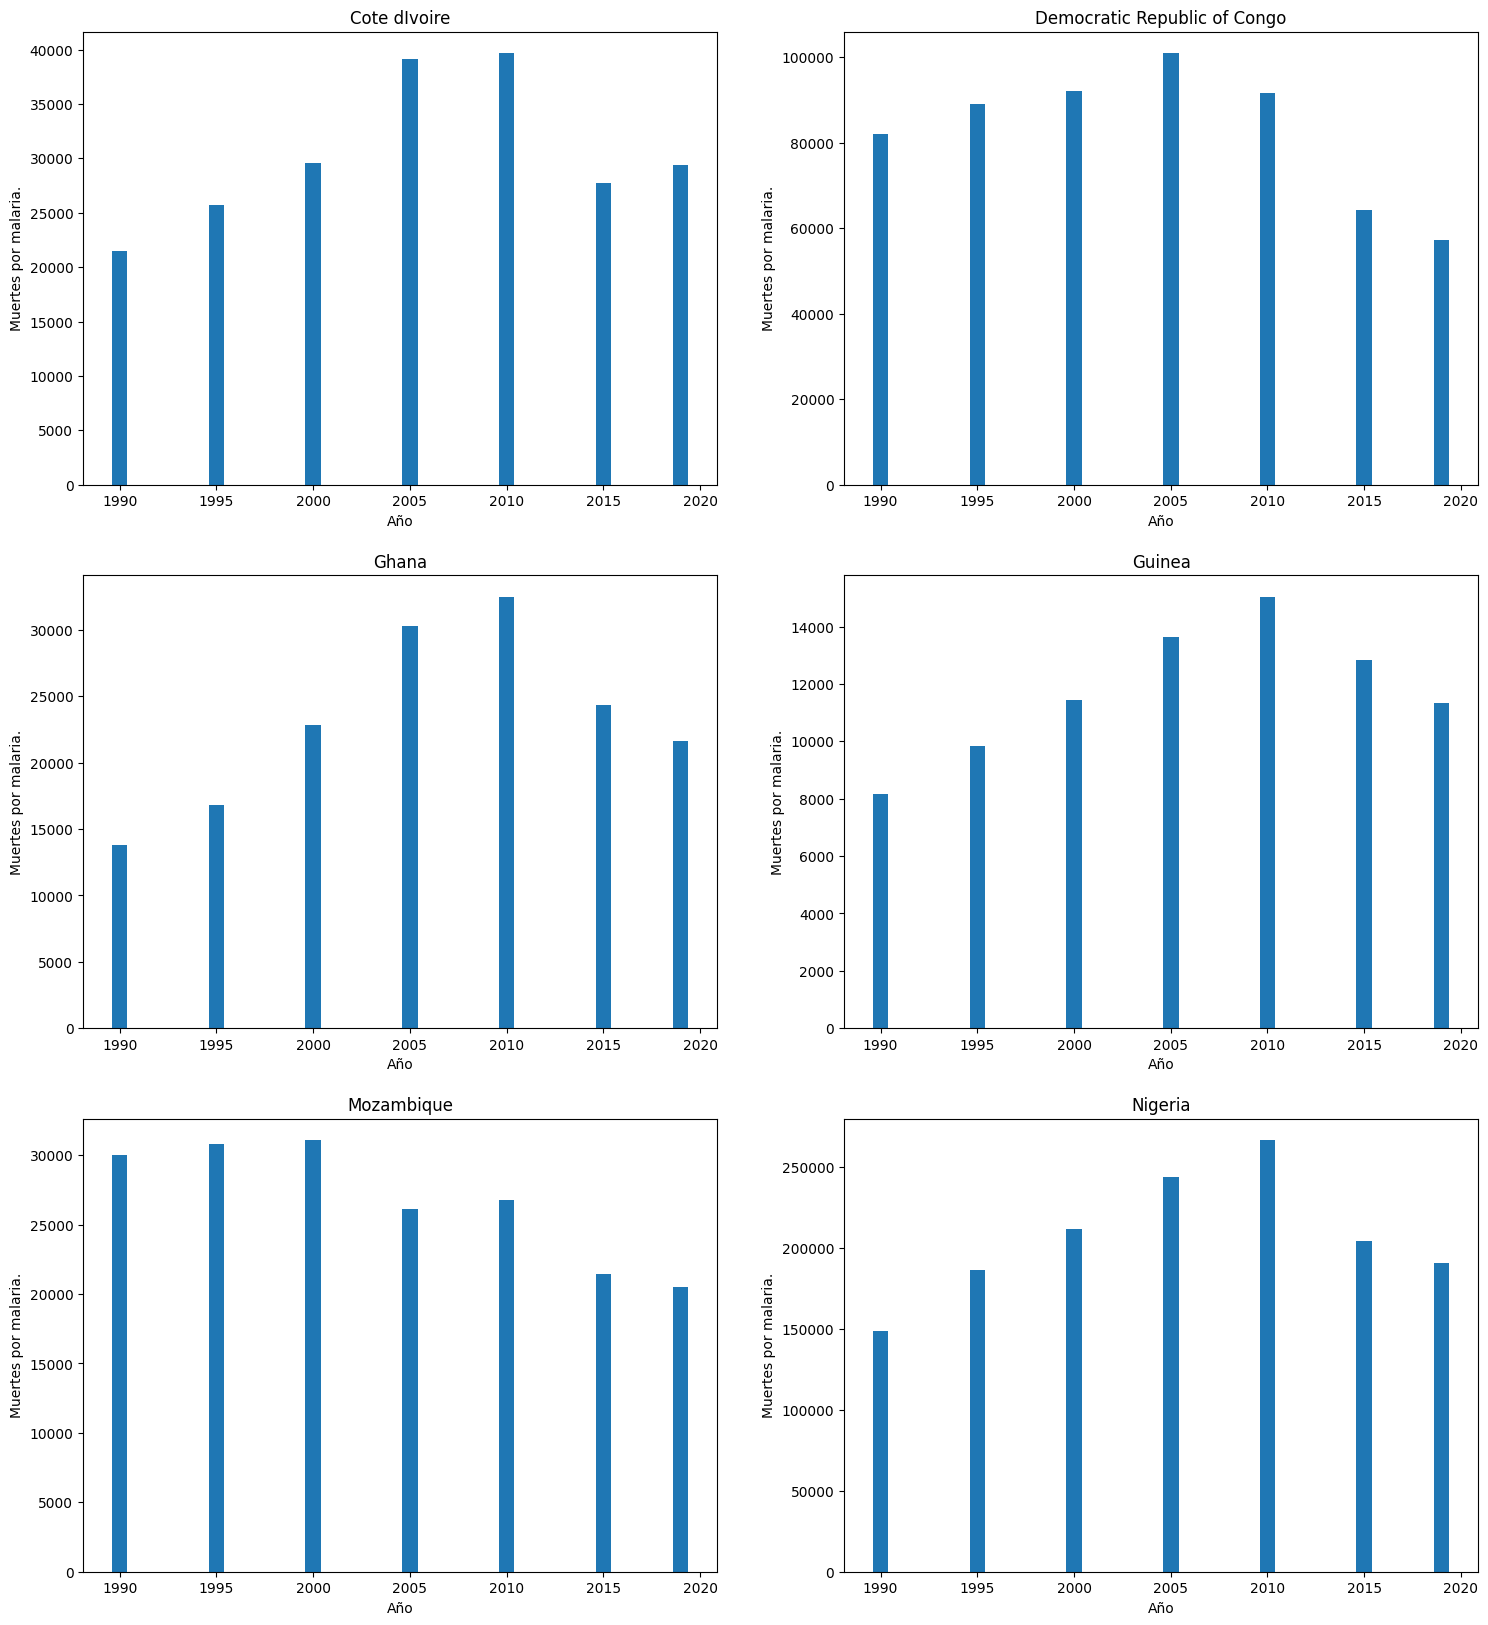

In [10]:
fig, ax = plt.subplots(nrows=3,ncols=2,figsize = (18,20))
agr_mal = mal.groupby(['Entity','Year'])['Malaria fatalities'].mean().unstack().T
i,j = 0,0
for p in p_m:
    ax[i,j].bar(x=agr_mal.index, height=agr_mal[p])
    ax[i,j].set_title(p)
    ax[i,j].set_xlabel('Año')
    ax[i,j].set_ylabel('Muertes por malaria.')
    j += 1
    if j == 2:
        j = 0
        i += 1

### Vemos que hubo un pico en 2010 en casi todos los países, pero su tendencia es que el número de muertos se encuentra en descenso.

In [26]:
b90_19 = data.query('Year in [1990,2019]')
b1990 = data.query('Year == 1990')
l1 = ['Entity','Year','Measles fatalities']
m_9019 = b90_19[l1]
m_1990 = b1990[l1]
m_2019 = b2019[l1]
s1990 = m_1990.sort_values(by='Measles fatalities', ascending=False, inplace=False)
s2019 = m_2019.sort_values(by='Measles fatalities', ascending=False, inplace=False)
s9019 = m_9019.sort_values(by='Measles fatalities', ascending=False, inplace=False)


In [40]:
s9019[:10]


,Entity,Year,Measles fatalities
6600,World,1990,801683
6690,World Bank Lower Middle Income,1990,485817
5670,SubSaharan Africa wb,1990,382050
30,African Region who,1990,347385
5490,South Asia wb,1990,270728
6660,World Bank Low Income,1990,255539
5580,SouthEast Asia Region who,1990,232892
2130,G20,1990,221427
2670,India,1990,156021
1680,Eastern Mediterranean Region who,1990,155888


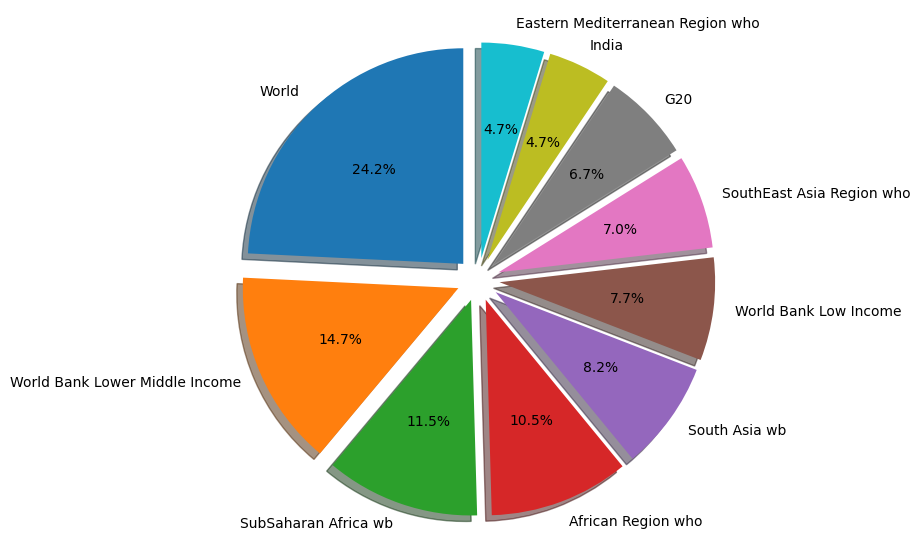

In [41]:
fig, ax = plt.subplots(figsize=((8,7)))
explode =[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
ax.pie(s9019['Measles fatalities'][:10], labels=s9019['Entity'][:10],explode=explode, shadow=True, startangle=90,autopct='%1.1f%%');


In [43]:
s2019[:10]

,Entity,Year,Measles fatalities
6629,World,2019,83392
5699,SubSaharan Africa wb,2019,65957
59,African Region who,2019,57896
6689,World Bank Low Income,2019,54867
6719,World Bank Lower Middle Income,2019,26533
1709,Eastern Mediterranean Region who,2019,13433
4169,Niger,2019,10904
5519,South Asia wb,2019,9963
5459,Somalia,2019,7437
5609,SouthEast Asia Region who,2019,7416


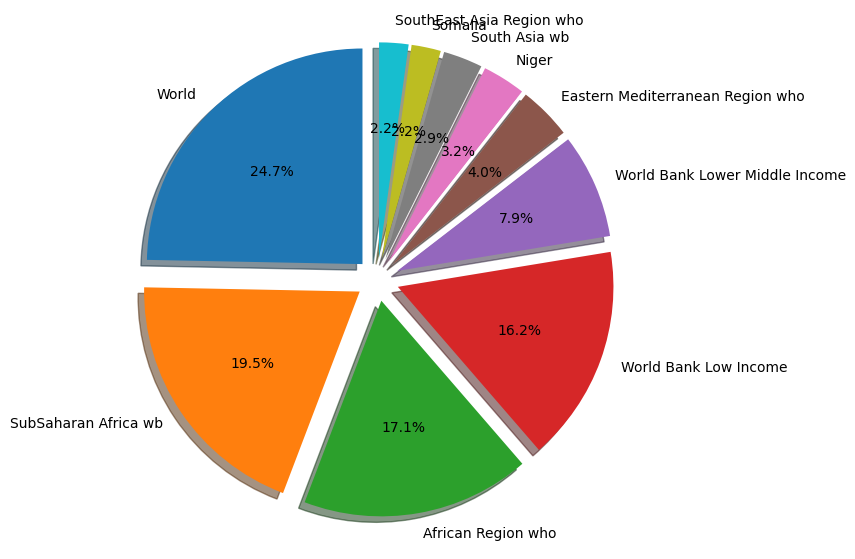

In [42]:
fig, ax = plt.subplots(figsize=((8,7)))
explode =[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
ax.pie(s2019['Measles fatalities'][:10], labels=s2019['Entity'][:10],explode=explode, shadow=True, startangle=90,autopct='%1.1f%%');